# (실습) 케라스와 텐서플로우

## [TensorFlow Playground](https://playground.tensorflow.org)

[TensorFlow Playground](https://playground.tensorflow.org)에서 분류와 회귀 모델의 학습과정을 살펴 보면서 
문제를 해결하는 최선의 모델을 찾고자 한다.
그런 다음에 아래 요소들에 적절한 값이 선택된 이유를 (추정해서) 설명할 수 있어야 한다.

- 특성(features) 선택
- 학습률(learning rate)
- 활성화 함수(activation function)
- 규제(regularization)와 규제율(regularization rate)
- 훈련셋(training set)대 테스트셋(test set) 비율
- 배치 크기(batch size)
- 은닉층(hidden layer)과 유닛(unit 또는 neuron) 수

**모델 A**

아래 그림은 음성 데이터(주황색)와 양성 데이터(파랑색)를 분류하는 목적으로 훈련 시키려 하는 심층 신경망 모델을 보여준다.

- 입력 특성: $\mathrm{x}_1$과 $\mathrm{x}_2$ 두 개
- 은닉층(hidden layer) 2개
    - 첫째 은닉층: 유닛 4개
    - 둘째 은닉층: 유닛 2개
- 출력값 1개: 양성/음성 여부 판단
    
유닛과 유닛을 연결하는 파란선/주황선은 각각 양의 가중치와 음의 가중치 값을 가리킨다.
선의 두께는 가중치의 절댓값에 해당한다.
즉, 두꺼운 선일 수록 해당 가중치가 출력 유닛에 저장되는 값을 계산할 때 기여도가 보다 크다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a07.jpg" style="width:700px;"></div>


위 사진의 모델을 훈련시키면 다음과 같이 결과가 나온다.

- 훈련 에포크: 505
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.003
    - 훈련셋에 대한 손실값: 0.001



<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a05.png" style="width:700px;"></div>


**모델 B**

반면에 하나의 은닉층만 사용하면 결과가 다르게 나온다.

- 은닉층(hidden layer) 1개
    - 첫째 은닉층: 유닛 4개
- 훈련 에포크: 511
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.016
    - 훈련셋에 대한 손실값: 0.004

즉, 훈련된 모델의 성능(평가지표)가 두 개의 은닉층을 사용하는 모델보다 나쁘다.
특히 테스트셋에 대한 성능이 훈련셋에 대한 성능보다 많이 떨어져서
과대적합(overfitting)이 보다 심하게 발생했다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a04.png" style="width:700px;"></div>


**모델 C**

은닉층을 아래 그림에서처럼 세 개로 늘리면 성능이 두 개의 은닉층을 사용할 때보다 성능이 좀 더 좋아진다.

- 은닉층(hidden layer) 3개
    - 첫째 은닉층: 유닛 4개
    - 둘째 은닉층: 유닛 3개
    - 둘째 은닉층: 유닛 2개
- 훈련 에포크: 234
- 학습률: 0.03
- 층에 사용되는 활성화 함수: Tanh
- 평가 지표
    - 테스트셋에 대한 손실값: 0.001
    - 훈련셋에 대한 손실값: 0.001

에포크가 234로 이전보다 훨씬 빠르게 좋은 분류 모델을 학습시킨다. 
은닉층을 늘린다고 무조건 좋아지는 것은 일반적으로 아니지만 이 경우엔 최선의 결과를 낳았다.


<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/dlp2/master/jupyter-book/imgs/ch03-tf-playground-a06.png" style="width:700px;"></div>


## 케라스 활용

케라스를 이용하여 앞서 소개한 모델 A, 모델 B, 모델 C를 직접 구성해서
훈련시키고자 한다.
훈련에 사용되는 데이터셋은 아래 코드를 이용하여 생성한다.

In [1]:
import tensorflow as tf
import numpy as np
import sklearn
import matplotlib.pyplot as plt

[`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) 함수를 이용하여 모델 학습에 사용될 데이터셋을 생성한다.

- `datasets`: 입력 데이터셋. (2000, 2) 모양의 텐서. 2000개의 데이터 샘플 포함. 양성, 음성 각각 1000개
- `targets`: 타깃 데이터셋. 0과 1로 구성된 (2000,) 모양의 텐서. 0은 음성, 1은 양성.

In [5]:
from sklearn.datasets import make_circles
dataset, targets = make_circles(2000, noise=0.1, factor=0.2)

양성은 파란색, 음성은 주황색으로 표시한 데이터 산점도는 다음과 같다.

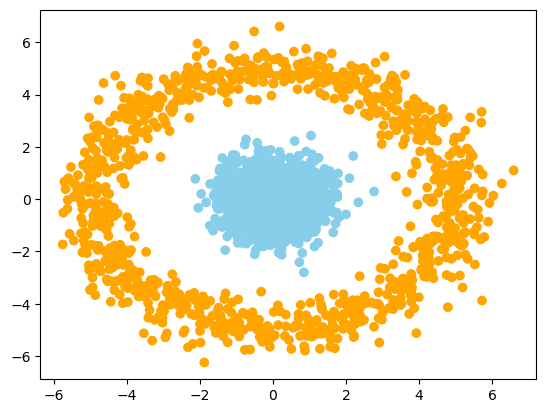

In [17]:

plt.scatter(dataset[:,0]*5, dataset[:,1]*5, c=['orange' if i==0 else 'skyblue' for i in targets])
plt.show()

**문제 1**

케라스를 이용하여 모델 A, 모델 B, 모델 C를 구성한 다음에 위 데이터셋을 이용하여 훈련시킨 결과를 설명하라.

**문제 2**

아래 설정을 변경하면서 최고 성능의 하이퍼파라미터 조합을 확인하라.

- 훈련셋과 테스트셋의 비율
- 배치 크기
- 학습률
- 규제와 규제율
- 활성화 함수
- 에포크
- 층과 유닛의 개수

## 텐서플로우 활용

아래 코드는 순수 텐서플로우를 이용하여 이진분류 문제를 해결하는 코드이다.

In [ ]:
import numpy as np
import tensorflow as tf

# 데이터셋 크기
num_samples_per_class = 1000

# 음성 데이터셋
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# 양성 데이터셋
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

# 입력 및 타깃 데이터셋
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

# 가중치와 편향        
input_dim = 2     # 입력 샘플의 특성이 2개
output_dim = 1    # 하나의 값으로 출력

# 가중치: 무작위 초기화
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# 편향: 0으로 초기화
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 모델 지정(하나의 층 사용)
def model(inputs):
    return tf.matmul(inputs, W) + b

# 손실함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 학습률
learning_rate = 0.1

# 훈련 스텝
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# 모델 학습
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9927
Loss at step 1: 0.1929
Loss at step 2: 0.1130
Loss at step 3: 0.0973
Loss at step 4: 0.0898
Loss at step 5: 0.0839
Loss at step 6: 0.0787
Loss at step 7: 0.0739
Loss at step 8: 0.0695
Loss at step 9: 0.0655
Loss at step 10: 0.0619
Loss at step 11: 0.0586
Loss at step 12: 0.0556
Loss at step 13: 0.0529
Loss at step 14: 0.0504
Loss at step 15: 0.0481
Loss at step 16: 0.0461
Loss at step 17: 0.0442
Loss at step 18: 0.0425
Loss at step 19: 0.0409
Loss at step 20: 0.0395
Loss at step 21: 0.0382
Loss at step 22: 0.0370
Loss at step 23: 0.0359
Loss at step 24: 0.0350
Loss at step 25: 0.0341
Loss at step 26: 0.0333
Loss at step 27: 0.0325
Loss at step 28: 0.0318
Loss at step 29: 0.0312
Loss at step 30: 0.0307
Loss at step 31: 0.0302
Loss at step 32: 0.0297
Loss at step 33: 0.0293
Loss at step 34: 0.0289
Loss at step 35: 0.0285
Loss at step 36: 0.0282
Loss at step 37: 0.0279
Loss at step 38: 0.0277
Loss at step 39: 0.0274


위 코드의 실행결과는 다음과 같이 이진분류 모델이다.

<div align="center"><img src="https://drek4537l1klr.cloudfront.net/chollet2/HighResolutionFigures/figure_3-8.png" style="width:500px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://www.manning.com/books/deep-learning-with-python-second-edition">Deep Learning with Python(2판)</a>&gt;</div></p>

**문제 1**

위 코드는 학습과정에서 전체 데이터셋을 하나의 배치로 사용한다.
미니배치 학습을 지원하도록 코드를 수정한 후에 훈련을 진행하여 최선의 모델을 구현하라.
배치 크기는 32로 한다.

**문제 2**

`metrics`로 예측 정확도를 훈련 과정 중에 측정하는 기능을 추가하라. 

**문제 3**

위 코드는 입력값에서 바로 출력값을 계산한다. 
순전파에서 네 개의 유닛으로 구성된 층(layer)을 통과하도록 모델을 수정한 모델을 훈련시켜서
최선의 모델을 구현하라.
단, 미니 배치와 정확도를 측정하는 기능도 함께 사용한다.

힌트: [저수준 선형 분류 신경망](https://colab.research.google.com/github/codingalzi/dlp2/blob/master/excs/exc-keras_and_tf-example.ipynb)